In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

import string
import re
import demoji
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB


from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:

tweet_data = pd.read_csv(r"labeled_data.csv")


In [4]:
print(tweet_data.shape)

(24783, 7)


In [5]:
tweet_data.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [6]:
tweet_data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [7]:
tweet_data.tail()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies
24782,25296,3,0,0,3,2,~~Ruffled | Ntac Eileen Dahlia - Beautiful col...


In [8]:
tweet_data.sample(5)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
2187,2232,3,0,3,0,1,.@TheRevAl Hey you race baiting FBI informant ...
12984,13303,3,0,3,0,1,My bitch pussy got hella powers
22801,23280,3,0,2,1,1,White trash bash &#128540;&#127867; http://t.c...
4133,4255,3,1,2,0,1,@MissCleoBB @RachelEReilly @brendonvbb12 it su...
14728,15080,3,2,1,0,0,RT @CloutGod: Horrible rapper #1 Tyga - Most t...


In [9]:
tweet_data=tweet_data.drop(['Unnamed: 0'],axis=1)
tweet_data

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,6,0,6,0,1,youu got wild bitches tellin you lies


In [10]:
tweet_data.isna().sum()

count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [11]:
tweet_data.duplicated().sum()

0

In [12]:
tweet_data.describe()

,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


In [13]:
tweet_data[tweet_data['hate_speech']>0].describe()

,count,hate_speech,offensive_language,neither,class
count,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000
mean,3.382936,1.392349,1.827759,0.162828,0.764070
std,1.124272,0.658461,1.256703,0.594213,0.530344
min,3.000000,1.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,1.000000,0.000000,0.000000
50%,3.000000,1.000000,2.000000,0.000000,1.000000
75%,3.000000,2.000000,2.000000,0.000000,1.000000
max,9.000000,7.000000,8.000000,8.000000,2.000000


In [14]:
tweet_data[tweet_data['offensive_language']>0].describe()

,count,hate_speech,offensive_language,neither,class
count,21308.000000,21308.000000,21308.000000,21308.000000,21308.000000
mean,3.263328,0.266942,2.807349,0.189037,1.000751
std,0.916658,0.578783,1.082944,0.572051,0.315283
min,3.000000,0.000000,1.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,8.000000,2.000000


In [15]:
tweet_data[tweet_data['neither']>0].describe()

,count,hate_speech,offensive_language,neither,class
count,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000
mean,3.248175,0.108301,0.829231,2.310643,1.685113
std,0.899459,0.422802,1.138030,1.069688,0.508816
min,3.000000,0.000000,0.000000,1.000000,0.000000
25%,3.000000,0.000000,0.000000,1.000000,1.000000
50%,3.000000,0.000000,0.000000,3.000000,2.000000
75%,3.000000,0.000000,2.000000,3.000000,2.000000
max,9.000000,7.000000,8.000000,9.000000,2.000000


In [16]:
tweet_data[tweet_data['class']==0].describe()

,count,hate_speech,offensive_language,neither,class
count,1430.000000,1430.000000,1430.000000,1430.000000,1430.0
mean,3.108392,2.256643,0.755944,0.095804,0.0
std,0.648084,0.573994,0.487653,0.326007,0.0
min,3.000000,2.000000,0.000000,0.000000,0.0
25%,3.000000,2.000000,0.000000,0.000000,0.0
50%,3.000000,2.000000,1.000000,0.000000,0.0
75%,3.000000,2.000000,1.000000,0.000000,0.0
max,9.000000,7.000000,4.000000,4.000000,0.0


In [17]:
tweet_data[tweet_data['class']==1].describe()

,count,hate_speech,offensive_language,neither,class
count,19190.000000,19190.000000,19190.000000,19190.000000,19190.0
mean,3.268890,0.180459,3.003544,0.084888,1.0
std,0.923024,0.407220,0.954097,0.284093,0.0
min,3.000000,0.000000,2.000000,0.000000,1.0
25%,3.000000,0.000000,3.000000,0.000000,1.0
50%,3.000000,0.000000,3.000000,0.000000,1.0
75%,3.000000,0.000000,3.000000,0.000000,1.0
max,9.000000,4.000000,9.000000,3.000000,1.0


In [18]:
tweet_data[tweet_data['class']==2].describe()

,count,hate_speech,offensive_language,neither,class
count,4163.000000,4163.000000,4163.000000,4163.000000,4163.0
mean,3.172712,0.062935,0.264233,2.845544,2.0
std,0.746097,0.253524,0.461737,0.795181,0.0
min,3.000000,0.000000,0.000000,2.000000,2.0
25%,3.000000,0.000000,0.000000,2.000000,2.0
50%,3.000000,0.000000,0.000000,3.000000,2.0
75%,3.000000,0.000000,1.000000,3.000000,2.0
max,9.000000,3.000000,4.000000,9.000000,2.0


In [19]:
print(string.punctuation)
def remove_punctuation(tweet):
    punctuationfree="".join([i for i in tweet if i not in string.punctuation])
    return punctuationfree

tweet_data['preprocess_tweet']= tweet_data['tweet'].apply(lambda x:remove_punctuation(x))
tweet_data.head()

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


,count,hate_speech,offensive_language,neither,class,tweet,preprocess_tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT mayasolovely As a woman you shouldnt compl...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT mleew17 boy dats coldtyga dwn bad for cuff...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT UrKindOfBrand Dawg RT 80sbaby4life You eve...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT CGAnderson vivabased she look like a tranny
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT ShenikaRoberts The shit you hear about me ...


In [20]:
tweet_data['preprocess_tweet']= tweet_data['preprocess_tweet'].apply(lambda x: x.lower())
tweet_data.head()

,count,hate_speech,offensive_language,neither,class,tweet,preprocess_tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,rt mayasolovely as a woman you shouldnt compl...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt mleew17 boy dats coldtyga dwn bad for cuff...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt urkindofbrand dawg rt 80sbaby4life you eve...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt cganderson vivabased she look like a tranny
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt shenikaroberts the shit you hear about me ...


In [21]:
def tokenization(tweet):
    tokens = re.split('W+',tweet)
    return tokens

tweet_data['preprocess_tweet']= tweet_data['preprocess_tweet'].apply(lambda x: tokenization(x))
tweet_data.head()

,count,hate_speech,offensive_language,neither,class,tweet,preprocess_tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,[ rt mayasolovely as a woman you shouldnt comp...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,[ rt mleew17 boy dats coldtyga dwn bad for cuf...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,[ rt urkindofbrand dawg rt 80sbaby4life you ev...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,[ rt cganderson vivabased she look like a tranny]
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,[ rt shenikaroberts the shit you hear about me...


In [22]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords[0:10])

def remove_stopwords(Tweet):
    output= [i for i in Tweet if i not in stopwords]
    return output

tweet_data['preprocess_tweet']= tweet_data['preprocess_tweet'].apply(lambda x:remove_stopwords(x))
tweet_data.head()

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


,count,hate_speech,offensive_language,neither,class,tweet,preprocess_tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,[ rt mayasolovely as a woman you shouldnt comp...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,[ rt mleew17 boy dats coldtyga dwn bad for cuf...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,[ rt urkindofbrand dawg rt 80sbaby4life you ev...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,[ rt cganderson vivabased she look like a tranny]
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,[ rt shenikaroberts the shit you hear about me...


In [23]:
porter_stemmer = PorterStemmer()

def stemming(Tweet):
    stem_Tweet = [porter_stemmer.stem(word) for word in Tweet]
    return stem_Tweet

tweet_data['preprocess_tweet']=tweet_data['preprocess_tweet'].apply(lambda x: stemming(x))
tweet_data.head()

,count,hate_speech,offensive_language,neither,class,tweet,preprocess_tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,[ rt mayasolovely as a woman you shouldnt comp...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,[ rt mleew17 boy dats coldtyga dwn bad for cuf...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,[ rt urkindofbrand dawg rt 80sbaby4life you ev...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,[ rt cganderson vivabased she look like a tranni]
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,[ rt shenikaroberts the shit you hear about me...


In [24]:
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatizer(Tweet):
    lemm_Tweet = [wordnet_lemmatizer.lemmatize(word) for word in Tweet]
    return lemm_Tweet

tweet_data['preprocess_tweet']=tweet_data['preprocess_tweet'].apply(lambda x:lemmatizer(x))
tweet_data.head()

,count,hate_speech,offensive_language,neither,class,tweet,preprocess_tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,[ rt mayasolovely as a woman you shouldnt comp...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,[ rt mleew17 boy dats coldtyga dwn bad for cuf...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,[ rt urkindofbrand dawg rt 80sbaby4life you ev...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,[ rt cganderson vivabased she look like a tranni]
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,[ rt shenikaroberts the shit you hear about me...


In [25]:
def get_sentence(words):
    sentence = ' '.join(words)
    return sentence

tweet_data['preprocess_tweet']=tweet_data['preprocess_tweet'].apply(lambda x: get_sentence(x))
tweet_data.head()

,count,hate_speech,offensive_language,neither,class,tweet,preprocess_tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,rt mayasolovely as a woman you shouldnt compl...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt mleew17 boy dats coldtyga dwn bad for cuff...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt urkindofbrand dawg rt 80sbaby4life you eve...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt cganderson vivabased she look like a tranni
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt shenikaroberts the shit you hear about me ...


In [26]:
def remove_emoji(tweet):
    dem = demoji.findall(tweet)
    for item in dem.keys():
        tweet = tweet.replace(item, '')
    return tweet

tweet_data['preprocess_tweet']= tweet_data['preprocess_tweet'].apply(lambda x: remove_emoji(x))
tweet_data.head()

,count,hate_speech,offensive_language,neither,class,tweet,preprocess_tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,rt mayasolovely as a woman you shouldnt compl...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt mleew17 boy dats coldtyga dwn bad for cuff...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt urkindofbrand dawg rt 80sbaby4life you eve...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt cganderson vivabased she look like a tranni
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt shenikaroberts the shit you hear about me ...


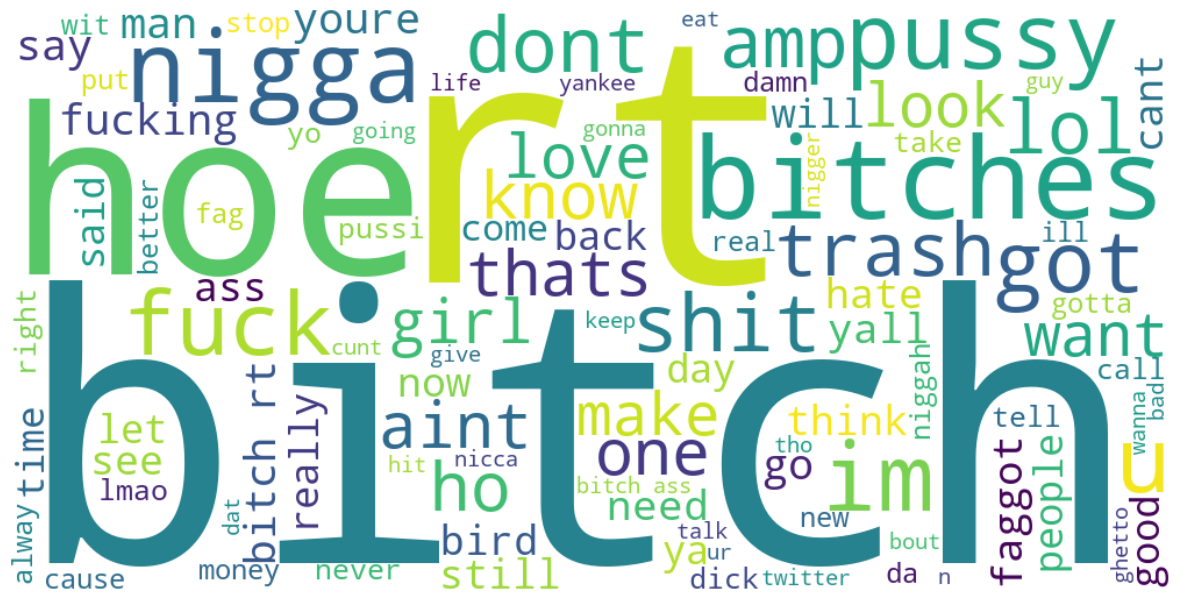

In [27]:
tweet=" ".join(i for i in tweet_data.preprocess_tweet)
stopwords=set(STOPWORDS)
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords, max_words=100,
                min_font_size = 10).generate(tweet)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
tweet_data.head()

,count,hate_speech,offensive_language,neither,class,tweet,preprocess_tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,rt mayasolovely as a woman you shouldnt compl...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt mleew17 boy dats coldtyga dwn bad for cuff...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt urkindofbrand dawg rt 80sbaby4life you eve...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt cganderson vivabased she look like a tranni
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt shenikaroberts the shit you hear about me ...


In [29]:
tweet_data_hate = tweet_data[tweet_data["class"]==0]
tweet_data_offensive = tweet_data[tweet_data["class"]==1]
tweet_data_neither = tweet_data[tweet_data["class"]==2]

In [30]:
print(tweet_data_hate.shape)

(1430, 7)


In [31]:
def getPolarity(Tweet):
    return TextBlob(Tweet).sentiment.polarity

tweet_data['polarity']=tweet_data['preprocess_tweet'].apply(getPolarity)
tweet_data.sample(5)

,count,hate_speech,offensive_language,neither,class,tweet,preprocess_tweet,polarity
21732,3,0,3,0,1,These bitches love soda,these bitches love soda,0.5
21567,3,0,3,0,1,The hoes are for EVERYBODY my nigga!,the hoes are for everybody my nigga,0.0
24449,3,0,0,3,2,some kid in an angry birds costume bumped into...,some kid in an angry birds costume bumped into...,-0.5
15484,3,0,3,0,1,RT @HighSociety26: These old hoes is madddd th...,rt highsociety26 these old hoes is madddd that...,0.1
18397,3,0,3,0,1,RT @____LilRambo: &#8220;@Dollvsh_: I don't be...,rt lilrambo 8220dollvsh i dont be fucking with...,-0.2


In [32]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
tweet_data['sentiment']=tweet_data['polarity'].apply(getAnalysis)
tweet_data.sample(5)

,count,hate_speech,offensive_language,neither,class,tweet,preprocess_tweet,polarity,sentiment
9286,3,0,3,0,1,Fuck them kids bitch,fuck them kids bitch,-0.4000,Negative
18684,3,0,2,1,1,RT @breebree1731: What a bitch.,rt breebree1731 what a bitch,0.0000,Neutral
19281,3,0,3,0,1,RT @itsDorry: school doesnt even test your int...,rt itsdorry school doesnt even test your intel...,0.3000,Positive
12015,3,1,2,0,1,"Its too early for all this bullshit, fuck all ...",its too early for all this bullshit fuck all y...,-0.1500,Negative
15337,3,0,3,0,1,RT @GeorgeKelleyJr: If ur 20+ and still need u...,rt georgekelleyjr if ur 20 and still need ur p...,-0.1875,Negative


In [33]:
tweet_data_negative = tweet_data[tweet_data["sentiment"]=='Negative']
tweet_data_positive = tweet_data[tweet_data["sentiment"]=='Positive']
tweet_data_neutral = tweet_data[tweet_data["sentiment"]=='Neutral']

In [34]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=["Total","Percentage"])
count_values_in_column(tweet_data,"sentiment")

,Total,Percentage
sentiment,,
Neutral,10254,41.38
Negative,7271,29.34
Positive,7258,29.29


In [35]:
def getSubjectivity(Tweet):
    return TextBlob(Tweet).sentiment.subjectivity

In [36]:
tweet_data['subjectivity']=tweet_data['preprocess_tweet'].apply(getSubjectivity)
tweet_data.head()

,count,hate_speech,offensive_language,neither,class,tweet,preprocess_tweet,polarity,sentiment,subjectivity
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,rt mayasolovely as a woman you shouldnt compl...,0.000000,Neutral,0.000000
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt mleew17 boy dats coldtyga dwn bad for cuff...,-0.700000,Negative,0.666667
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt urkindofbrand dawg rt 80sbaby4life you eve...,-0.333333,Negative,0.700000
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt cganderson vivabased she look like a tranni,0.000000,Neutral,0.000000
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt shenikaroberts the shit you hear about me ...,0.075000,Positive,0.725000


In [37]:
tweet_data.to_excel('preprcessed_labeled_data.xlsx',index=False)

In [38]:
tweet_data = pd.read_excel('preprcessed_labeled_data.xlsx')
print(tweet_data.shape)

(24783, 10)


In [39]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   count               24783 non-null  int64  
 1   hate_speech         24783 non-null  int64  
 2   offensive_language  24783 non-null  int64  
 3   neither             24783 non-null  int64  
 4   class               24783 non-null  int64  
 5   tweet               24782 non-null  object 
 6   preprocess_tweet    24783 non-null  object 
 7   polarity            24783 non-null  float64
 8   sentiment           24783 non-null  object 
 9   subjectivity        24783 non-null  float64
dtypes: float64(2), int64(5), object(3)
memory usage: 1.9+ MB


# Machine Learning

In [40]:
X=tweet_data['preprocess_tweet']
Y=tweet_data['class']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17348,)
(7435,)
(17348,)
(7435,)


In [43]:
vectoriser = CountVectorizer()
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

Vectoriser fitted.
No. of feature_words:  32461


In [44]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


In [45]:
noise = np.random.normal(0, 0.1, X_train.shape)
X_train_new = X_train + noise
X_train_new_array = np.asarray(X_train_new)

In [46]:
if np.any(X_train_new_array < 0):
    min_value = np.min(X_train_new_array)
    if min_value < 0:
        X_train_new_array += abs(min_value) 

In [47]:
clf = MultinomialNB()
clf.fit(X_train_new_array, y_train)

MultinomialNB()

In [48]:
predictions=clf.predict(X_train)
score=clf.score(X_train_new_array,y_train)
print(score*100)

77.50749365921143


In [49]:
print("Accuracy for training:",metrics.accuracy_score(y_train, predictions))
print(metrics.classification_report(y_train,predictions,zero_division=1))

Accuracy for training: 0.7749020059949274
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1003
           1       0.77      1.00      0.87     13443
           2       0.00      0.00      0.00      2902

    accuracy                           0.77     17348
   macro avg       0.59      0.33      0.29     17348
weighted avg       0.66      0.77      0.68     17348



In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0)

In [51]:
vectoriser = TfidfVectorizer()
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

Vectoriser fitted.
No. of feature_words:  32461


In [52]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


In [53]:
noise = np.random.normal(0, 0.1, X_test.shape)
X_test_new = X_test + noise
X_test_new_array = np.asarray(X_test_new)

In [54]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [55]:
predictions=clf.predict(X_test_new_array)
score=clf.score(X_test_new_array,y_test)
print(score*100)

55.305985205110964


In [56]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print(metrics.classification_report(y_test,predictions,zero_division=1))

Accuracy: 0.5530598520511096
              precision    recall  f1-score   support

           0       0.06      0.16      0.09       427
           1       0.79      0.63      0.70      5747
           2       0.23      0.32      0.27      1261

    accuracy                           0.55      7435
   macro avg       0.36      0.37      0.35      7435
weighted avg       0.65      0.55      0.59      7435



[[  67  260  100]
 [ 867 3638 1242]
 [ 154  700  407]]


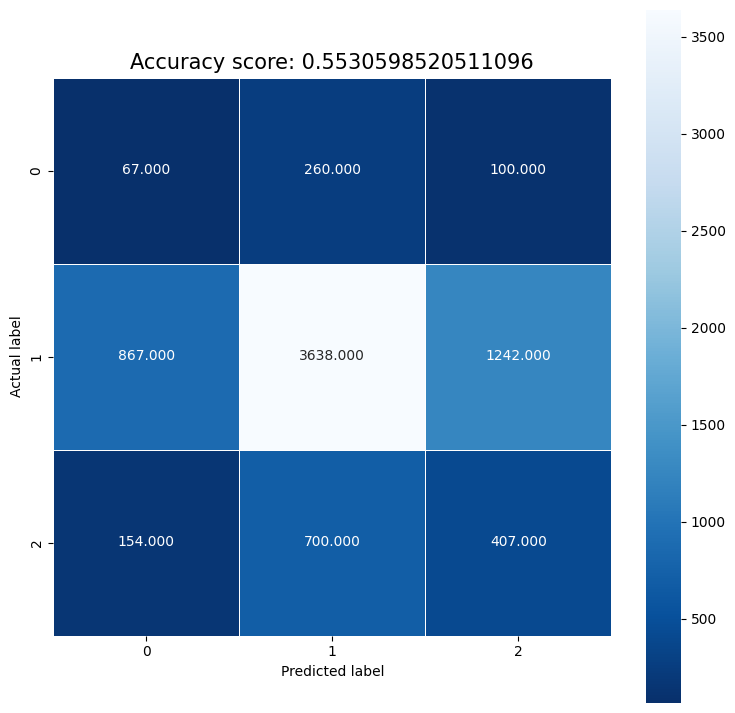

In [57]:
cm=metrics.confusion_matrix(y_test,predictions)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r");
plt.ylabel("Actual label");
plt.xlabel("Predicted label")
all_sample_title="Accuracy score: {0}".format(score)
plt.title(all_sample_title,size=15)
plt.show()